# SOK-1303 Mikroøkonomi

## Notater Produsentteori - kapittel 5


Vi forutsetter følgende om bedriftene som vi analyserer:

- Bedriften produserer ett homogent produkt
- Produksjonen kan måles
- Bedriften bruker to produksjonsfaktorer (arbeidskraft og kapital)
- Produksjonsfaktorer er homogene, målbare, og har faste gitte priser
- Forholdet mellom innsatsfaktorer og ferdigprodukt representeres med en produktfunksjon
- Produsenten tar produktprisen for gitt
- Produsentens mål er å maksimere fortjeneste

### 1. Isokost

Kostandfunksjon for produksjon med to produksjonsfaktorer:
$$C = wL + rK \tag{1}$$

hvor $w$ er lønn per arbeider, $L$ er antall arbeidere. Kostander for arbeid blir da $wL$. Kaptialkostnadene er prisen på kapital $(r)$ ganget med antall enheter kapital $(K)$
er prisen på bolig (B) og andre ting (A).      

En isokostlinje viser ulike kombinasjoner av arbeidskraft og kapital som mulig å oppnå for en gitt kostnad. For å tegne isolinjen kan vi omforme kostandfunksjonen slik at den står med:

$$K = \frac{C}{r} - \frac{w}{l}L \tag{2}$$

For å finne helningen til isokostlinjen deriverer vi mhp $L$

$$ -\frac{\partial K}{\partial L}=\frac{w}{r}$$


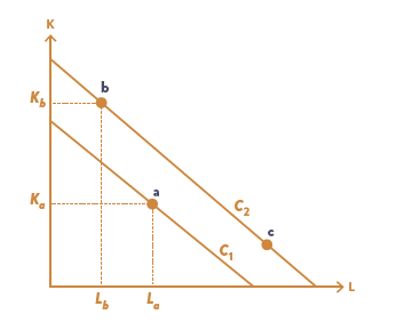

Figuren viser faktorkombinasjoner og isokostliner.

### 2. Produktfunksjon og isokvant


Generelt kan vi skrive at kvantum produsert (Q) er en funksjon av alle produksjonsfaktorer brukt i prosessen. Bruker bedriften arbeidskraft (L) og kapital (K) vil produktfunksjonen være
$$ Q = Q(K,L).$$

Produktfunksjonen viser sammenhengen mellom tre variabler (enheter ferdigprodukt, kapital og arbeidskraft). For å kunne tegne denne funksjonen i to dimensjoner må vi fastsette en verdi for én av variablene. Vi setter en fast verdi $Q_1$ på produksjon og skriver
$$Q_1 = f(K,L)\tag{3}$$

Likning (3) viser kombinasjoner av K og L som kan brukes for å produsere nøyaktig $Q_1$ enheter ferdig produkt. Dette er med andre ord en isokvant, som vises i figuren     

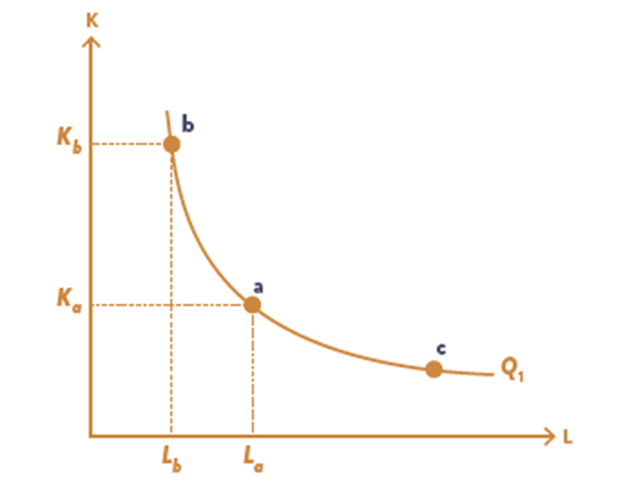


På lang sikt kan bedriften variere begge (alle) produksjonsfaktorer. For å si noe om helningen på isokvanten kan vi beregne grenseproduktiviteten til begge faktorene:
$$\frac{\partial Q}{\partial K}=MP_K>0\;,\frac{\partial Q}{\partial L}=MP_L>0\tag{4} .$$

Grenseproduktet sier noe om hvor mye produksjonen øker med når vi får en liten økning i en av produksjonsfaktorene. Vi ser at dette er et positivt tall, ettersom bedriften må produsere på en teknisk effektiv måte, dvs de vil ikke bruke mer innsatsfaktorer enn nødvendig. 

$$\frac{\partial MP_K}{\partial K}<0\;,\frac{\partial MP_L}{\partial L}<0\tag{5} .$$

Vi antar at det er avtakende grenseprodukt med hensyn på hver av produksjonsfatorene. Det betyr at etter hvert som man øker innsatsen av en faktor, mens den andre ligger fast, så vil grenseproduktet gå ned. Som i uttrykket"Jo flere kokker jo mer søl". Dette kalles for "loven om avtakene grenseprodukt".

Helningen på en isokvanten kan utledes ved å bruke regelen for implisitt derivasjon. Langs en isokvant er kvantum uendret og lik $Q_1$. Med produktfunksjon $Q(K,L)=Q_1$ får vi følgene uttrykket for helningen på isokvanten:
$$\begin{align}
-\frac{dK}{dL} &= \frac{\frac{\partial Q}{\partial L}}{\frac{\partial Q}{\partial K}}\tag {6}\\
\end{align}$$

Helningen på isokvanten kalles for "Den marginale tekniske subsitusjonsrate (MRTS)", og viser hvor mye mindre kapital man trenger dersom man øker innsatsen av arbeidakraft med en enhet, uten at produskjoen endres. Fra (4) vet vi at: 

$$ \frac{\partial Q}{\partial K}=MU_K, \frac{\partial Q}{\partial L}=MU_L$$

Og da kan MRTS uttrykkes som:
 $$ MRTS=\frac{MU_L}{MU_K}$$ 







#### Et eksempel

En bedrift bruker følgende produktfunksjon til å lage et gode


\begin{equation}
   Q = Q(K,L)=K^aL^{1-a}\tag{7}
\end{equation}


hvor $Q$ er enheter ferdigprodukt, $l$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital og $1>  a>0$ er et konstant tall.      
Vi skal beregne grenseproduktivitetene og MRTS for denne funksjonen; se matteboks 5.1.

In [2]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [3]:
# definer nye symboler
K, a, L, w, r, C, Q1  = sp.symbols('K a L w r C Q1', positive=True, real=True)

# definer ny produksjonsfunksjon (Cobb-Douglas)
def prod_cd(L,K,a):
    return K**a*L**(1-a)
prod_cd(L,K,a)


K**a*L**(1 - a)

In [4]:
# grenseproduktivitet til kaptial (K)
MP_K=sp.simplify(sp.diff(prod_cd(L,K,a),K))
MP_K

K**(a - 1)*L**(1 - a)*a

In [5]:
# grenseproduktivitet til arbeid (L)
MP_L=sp.simplify(sp.diff(prod_cd(L,K,a),L))
MP_L

(K/L)**a*(1 - a)

In [6]:
# beregn MRTS
MRTS=sp.simplify(MP_L/MP_K)
MRTS

K*(1 - a)/(L*a)

### 3. Kostnadsminimering
På lang sikt kan bedriften velge hvor mye av hver faktor som skal ansettes. Dette, sammen med evt. faste kostnader, vil bestemme produksjonskostnaden. Hvordan velger bedrifter faktorinnsatsen? Det er naturlig å tenke at bedriften vil maksimere sin fortjeneste (dette er ikke eneste mulighet, men et nauturlig utgangspunkt for mange produsenter). Gitt at bedriften tar alle priser for gitt vil en produsert mengde $Q$ gi en inntekt på $PQ$ NOK. Å maksimere fortjeneste er da det samme som å minimere kostnaden for å prodsuere denne mengden. Gitt at bedriften tar priser i faktormarkedet for gitt vil det koste $wL$ å ansette $L$ enheter med arbeidskraft, $rK$ å ansette $K$ enheter med kapital. Summen av disse utgiftene er det som bedriften vil minimere ved optimale valg av innsatsfaktorer. Vi kan se bort fra faste kostnader i beregningen.       
Minimeringsproblemet til bedriften er da
$$ minimer \;\; C\;\; for\;\; Q=Q_1$$
hvor $Q_1$ er mengden som bedriften ønsker å produsere. Tenk at vi har kun to faktorer, arbeidskraft og kapital, og bedriften bruker følgende teknologi: $Q=f(K,L)$. Da kan vi skrive kostnadsminimeringsproblemet som:        
$$ min_{L,K}\;wL+rK \;\; ubb\;\; Q_1=Q(K,L).$$
Subskriften ved siden av "min" viser hvilke variabler det er vi skal velge (dvs de endogene variablene), og "ubb" betyr "under bibetingelse". Vi løses denne ved hjelp av Lagrange metoden. 

Hvordan skrive symbolet til Lagrange???

Vi setter opp Lagrange funksjonen:
$$L = wL+rK-\lambda (Q(K,L)-Q_1)$$
hvor $\lambda$ er en Lagrange multiplikator som viser verdien av å gjøre bibetingelsen mindre streng. I dette tilfellet viser det økningen i kostnaden dersom vi øke produskjonen med én enhet. Vi deriverer $L$ med hensyn på $L,K,\lambda$:


$$\begin{align}
\frac{\partial L}{\partial L} &= w - \lambda\frac{\partial Q}{\partial L} = 0 \tag {8}\\
\frac{\partial L}{\partial K} &= r - \lambda \frac{\partial Q}{\partial K} = 0 \tag {9}\\
\frac{\partial L}{\partial \lambda} &= Q(K,L)-Q_1 = 0 \tag {10}\\
\end{align}$$


Legg merke til at (10) innebærer at løsningen som vi finner må tilfredsstille bibetingelsen. Vi kan skrive om (8) og (9):

$$\begin{align}
w &= \lambda\frac{\partial Q}{\partial L}\tag {11}\\
r &= \lambda\frac{\partial Q}{\partial K}\tag {12}\\
\end{align}$$

Deler vi (11) på (12) får vi

$$MRTS=\frac{MP_L}{MP_K}=\frac{w}{r} \tag{13}$$



Tolkningen av (13) er at den relative prisen på arbeidskraft er lik den marginale tekninske substitusjonsbrøken. 



### Oppskrift for kostnadsminimering

Vi ser på en bedrift som bruker arbeidskraft og kapital til å produsere et gode gjennom bruk av følgende teknologi: $Q=Q(K,L).$ Da kan vi skrive kostnadsminimeringsproblemet som:        
$$ min_{L,K}\;wL+rK \;\; ubb\;\; Q_1=Q(K;).$$

Vi har to ting må være oppfylt for å finne verdier på $L,K$ som gir et kostnadsminimum:

$$\begin{align}
\frac{MP_L}{MP_K}=\frac{w}{r}\tag {14} \\
Q_1 &=Q(K.L) \tag {15}\\
\end{align}$$

Vi ser på et eksempel med Cobb-Douglas funksjon hvor $Q(K,L)=L^aK^{1-a}.$ Se matteboks 5.2


In [7]:
# produktfunksjon
def prod(K,L):
    return (K**a)*(L**(1-a))
prod(K,L)

K**a*L**(1 - a)

In [8]:
# Steg 1: beregn MRTS
MRTS=sp.simplify(MP_L/MP_K)
MRTS

K*(1 - a)/(L*a)

In [9]:
# Steg 2: setter MRTS=w/r som i likning (14), og kan skrive denne som K/L = wa/r(1-a)

In [10]:
# Steg 3:Den optimale faktorkombinasjon for K finner vi ved å løse likning (14)

K_rel=sp.solve(MRTS-w/r,K)[0]
display(K_rel)

-L*a*w/(r*(a - 1))

In [11]:
# Dette uttrykket sett inn i produktfunksjonen Q og løses for L

prod1=prod(K,L).subs(K,K_rel)
display(prod1)


L**(1 - a)*(-L*a*w/(r*(a - 1)))**a

In [12]:
sp.simplify(prod1)   

L**(1 - a)*(-L*a*w/(r*(a - 1)))**a

In [15]:
# Optimal innsats av arbeidskraft
L_eq= sp.solve(prod1-Q1,L)[0]
display(L_eq)

Q1*(1/(a*w))**a/(-1/(r*(a - 1)))**a

In [16]:
sp.simplify(L_eq) 

Q1*(1/(a*w))**a/(-1/(r*(a - 1)))**a

In [15]:
#sett løsning av L inn i KA_rel for å få optimal innsats av kapital

K_eq= K_rel.subs(L,L_eq)
display(K_eq)

-Q1*a*w*(1/(a*w))**a/(r*(-1/(r*(a - 1)))**a*(a - 1))

In [16]:
K_opt=sp.simplify(K_rel.subs(L,L_eq))
K_opt

-Q1*a*w*(1/(a*w))**a/(r*(-1/(r*(a - 1)))**a*(a - 1))

Hvordan forenkle dette uttrykket ??

Her ser vi på en balansert Cobb-Douglas produktfunksjon der $a= 0.5$; $Q(K,L)=L^{0.5}K^{0.5}.$

In [22]:
# produktfunksjon a=0.5
def prod1(K,L):
    return (K**0.5*(L**0.5))
prod1(K,L)

K**0.5*L**0.5

In [23]:
# grenseproduktivitet til kaptial (K)
MP_K1=sp.simplify(sp.diff(prod(L,K),K))
MP_K1

0.5*L**0.5/K**0.5

In [24]:
# grenseproduktivitet til arbeid (L)
MP_L1=sp.simplify(sp.diff(prod(L,K),L))
MP_L1

0.5*K**0.5/L**0.5

In [26]:
# Steg 1: beregn MRTS
MRTS1=sp.simplify(MP_L1/MP_K1)
MRTS1

1.0*K**1.0/L**1.0

In [29]:
# Steg 3:Den optimale faktorkombinasjon for K finner vi ved å løse likning (14)

K_rel1=sp.solve(MRTS1-w/r,K)[0]
display(K_rel1)

L*w/r

In [30]:
# Dette uttrykket sett inn i produktfunksjonen Q og løses for L

prod1=prod(K,L).subs(K,K_rel1)
display(prod1)

L**1.0*w**0.5/r**0.5

In [31]:
# Optimal innsats av arbeidskraft
L_eq1= sp.solve(prod1-Q1,L)[0]
display(L_eq1)

Q1*sqrt(r)/sqrt(w)

In [32]:
# Optimal innsats av kapital
K_opt1=sp.simplify(K_rel1.subs(L,L_eq1))
K_opt1

Q1*sqrt(w)/sqrt(r)